# Galapagos Island Example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf

sns.set_style('darkgrid')

In [2]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    It uses Locally Weighted Scatterplot Smoothing (LOWESS) to fit a model. 
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    pred = model.fittedvalues
    influence = model.get_influence()
    resid_std = influence.resid_studentized_internal
    
    fig, ax = plt.subplots(1,2, figsize=(7.5,3.5))
    
    sns.regplot(x=pred, y=y, lowess=True, ax=ax[0], line_kws={'color':'darkorchid'})
    # I've added the ideal line (y=yhat) for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[min(pred), max(pred)], 
                 ax=ax[0], color='red', ls=':')
    ax[0].set_title('Observed vs. Predicted Values')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Observed')
    
    sns.regplot(x=pred, y=resid_std, lowess=True, ax=ax[1], line_kws={'color':'darkorchid'})
    # I've added the ideal line (y=0) for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[0,0], ax=ax[1], color='red', ls=':')
    ax[1].set_title('Residuals vs. Predicted Values')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Standardized Residual')
    
    return fig, ax

In [3]:
gala = pd.read_csv('gala.csv')
gala.head()

,id,island,species,area,elevation,nearest,scruz,adjacent
0,1,Baltra,58,25.09,346,0.6,0.6,1.84
1,2,Bartolome,31,1.24,109,0.6,26.3,572.33
2,3,Caldwell,3,0.21,114,2.8,58.7,0.78
3,4,Champion,25,0.10,46,1.9,47.4,0.18
4,5,Coamano,2,0.05,77,1.9,1.9,903.82


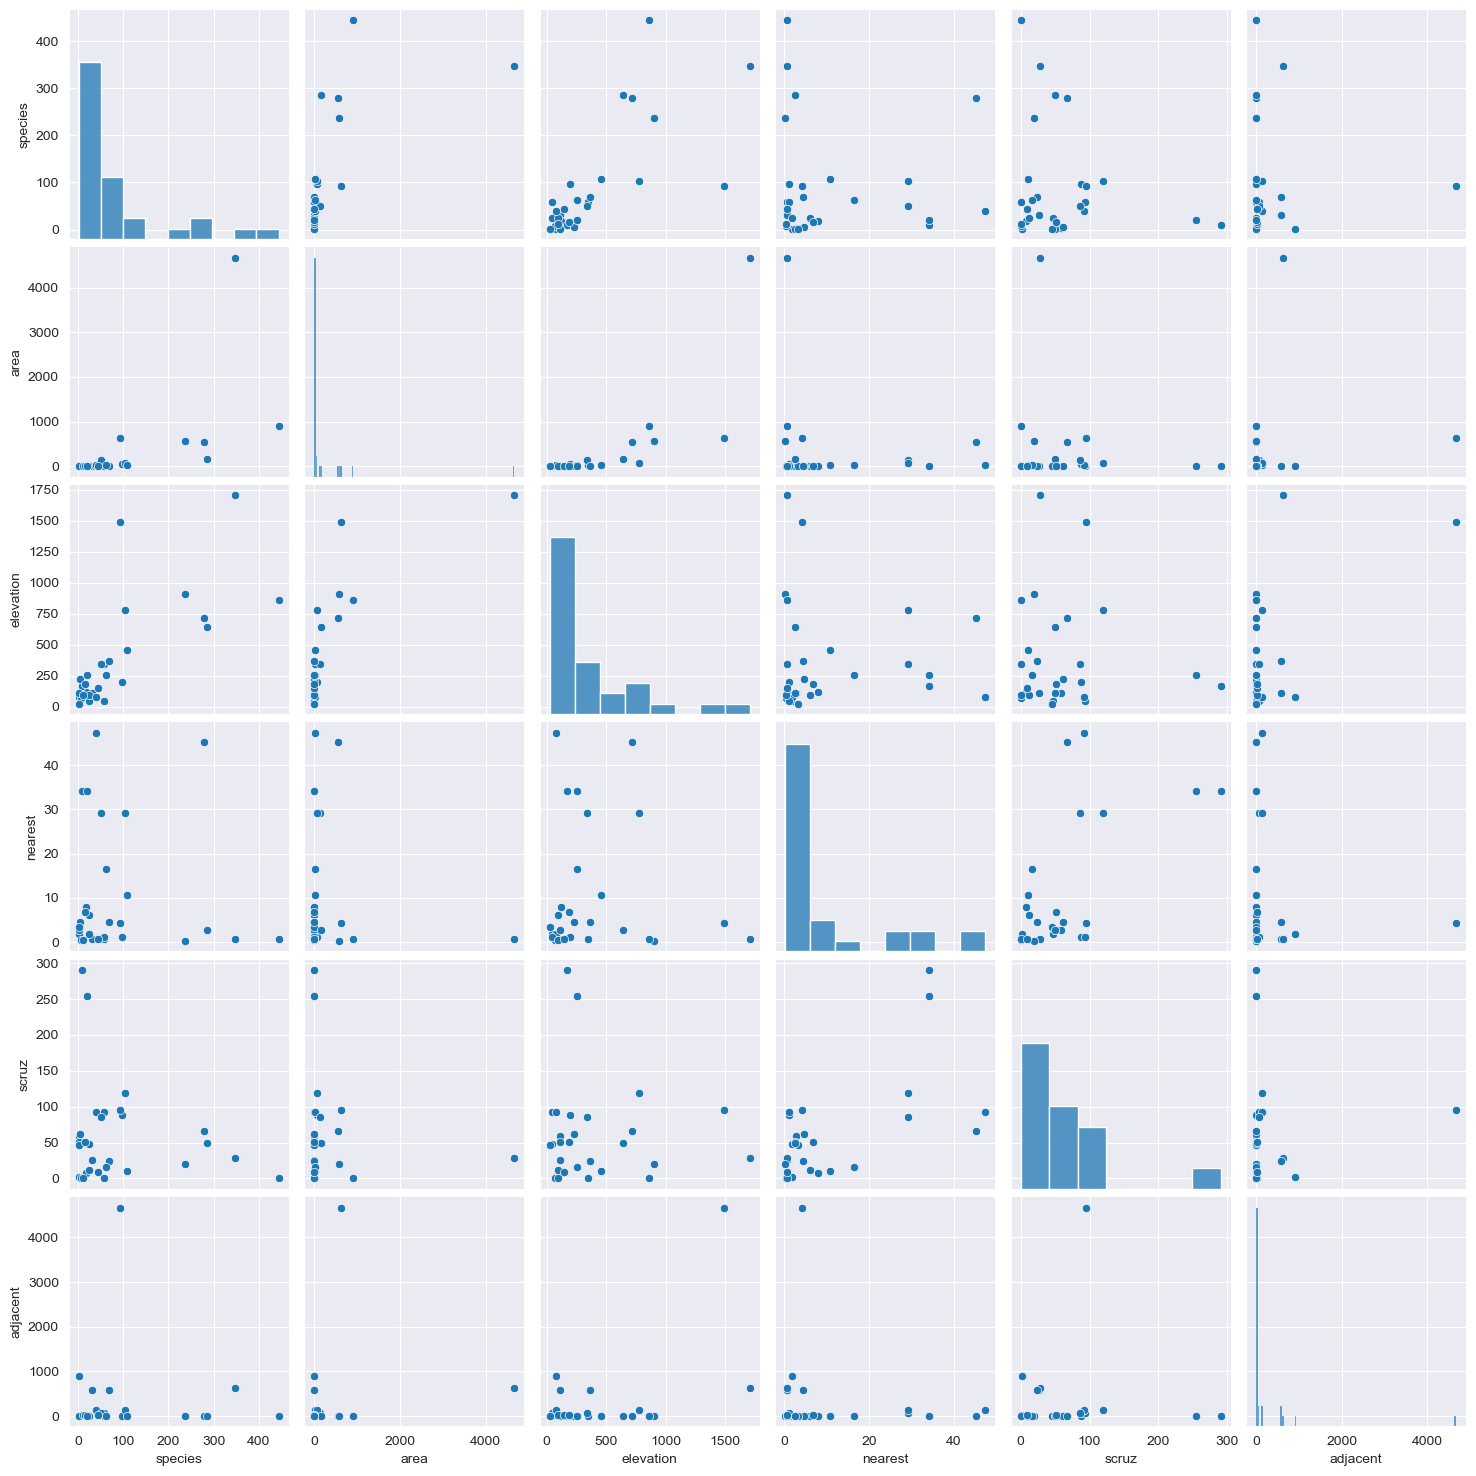

In [4]:
sns.pairplot(gala[['species','area','elevation','nearest','scruz','adjacent']])
plt.show()

<Axes: >

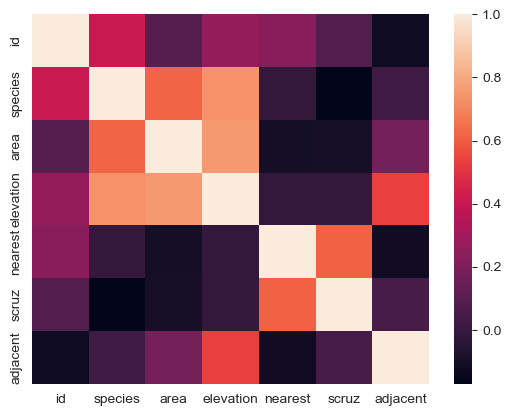

In [8]:
sns.heatmap(gala.select_dtypes(exclude=[object]).corr())

In [9]:
gala.select_dtypes(exclude=[object]).corr()

,id,species,area,elevation,nearest,scruz,adjacent
id,1.000000,0.406773,0.089922,0.263469,0.227835,0.080297,-0.129602
species,0.406773,1.000000,0.617843,0.738487,-0.014094,-0.171142,0.026166
area,0.089922,0.617843,1.000000,0.753735,-0.111103,-0.100785,0.180038
elevation,0.263469,0.738487,0.753735,1.000000,-0.011077,-0.015438,0.536458
nearest,0.227835,-0.014094,-0.111103,-0.011077,1.000000,0.615410,-0.116248
scruz,0.080297,-0.171142,-0.100785,-0.015438,0.615410,1.000000,0.051661
adjacent,-0.129602,0.026166,0.180038,0.536458,-0.116248,0.051661,1.000000


In [10]:
formula = 'species ~ area + elevation + nearest + scruz + adjacent'
gmodel = smf.ols(formula,gala).fit()
gmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.717   
Dependent Variable: species          AIC:                337.0700
Date:               2023-08-14 18:45 BIC:                345.4772
No. Observations:   30               Log-Likelihood:     -162.54 
Df Model:           5                F-statistic:        15.70   
Df Residuals:       24               Prob (F-statistic): 6.84e-07
R-squared:          0.766            Scale:              3718.0  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept     7.0682   19.1542   0.3690  0.7154  -32.4641  46.6005
area         -0.0239    0.0224  -1.0676  0.2963   -0.0702   0.0223
elevation     0.3195    0.0537   5.9532  0.0000    0.2087   0.4302
nearest       0.0091    1.0541   0.0087  0.9932   -2.1665   2.1848
scruz        -0.2405    0.2154  -1.1166  0.2752   -0.6851   0.2040
adjacent     -0.0748    0.0177  -4.2262  0.0003   -0.1113  -0.0383
-----------------------------------------------------------------
Omnibus:              12.683       Durbin-Watson:          2.476 
Prob(Omnibus):        0.002        Jarque-Bera (JB):       13.498
Skew:                 1.136        Prob(JB):               0.001 
Kurtosis:             5.374        Condition No.:          1900  
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

(<Figure size 750x350 with 2 Axes>,
 array([<Axes: title={'center': 'Observed vs. Predicted Values'}, xlabel='Predicted', ylabel='Observed'>,
        <Axes: title={'center': 'Residuals vs. Predicted Values'}, xlabel='Predicted', ylabel='Standardized Residual'>],
       dtype=object))

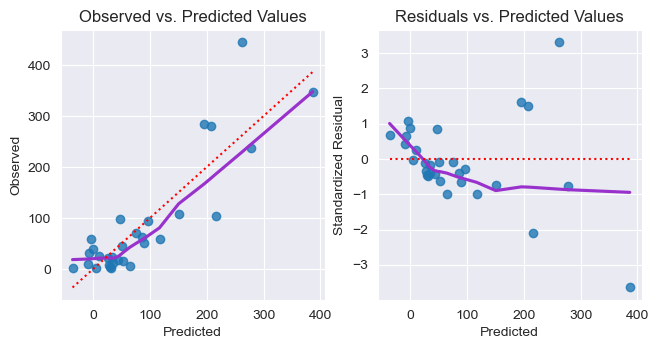

In [11]:
linearity_test(gmodel, gala['species'])

In [14]:
resid = gmodel.resid
pred = gmodel.fittedvalues

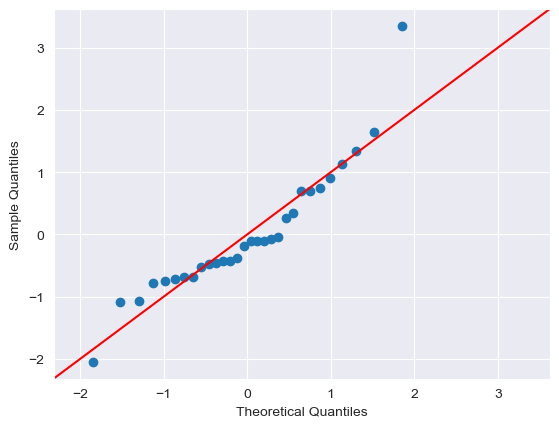

In [15]:
smg.qqplot(resid, fit=True, line='45')
plt.show()

In [18]:
gala['species_bc'], lamb, ci = stats.boxcox(gala['species'], alpha=.1)

In [19]:
lamb

0.08809980398939382

In [20]:
ci

(-0.10405870216714665, 0.2833314297933692)

In [21]:
gala['species_ln'] = gala['species'].apply(np.log)

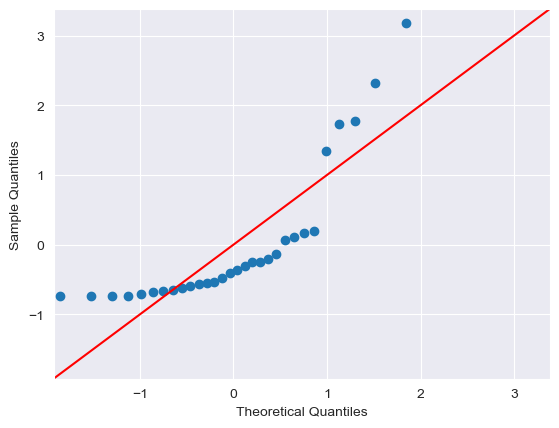

In [22]:
smg.qqplot(gala['species'], fit=True, line='45')
plt.show()

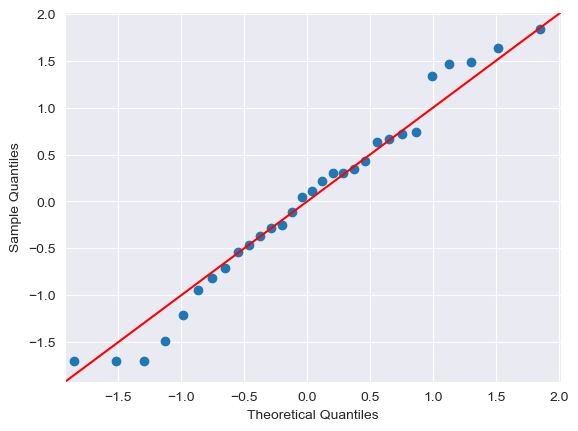

In [23]:
smg.qqplot(gala['species_bc'], fit=True, line='45')
plt.show()

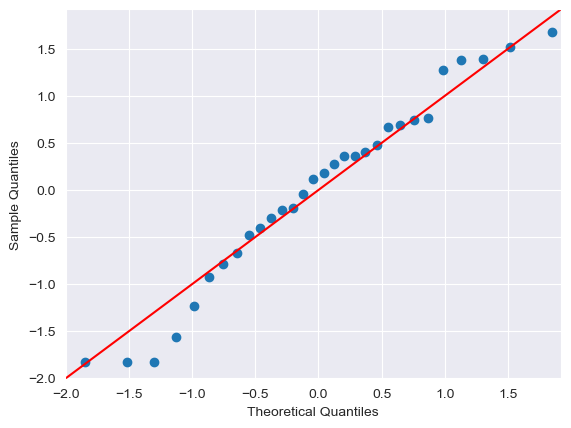

In [24]:
smg.qqplot(gala['species_ln'], fit=True, line='45')
plt.show()

In [25]:
formula = 'species_ln ~ area + elevation + nearest + scruz + adjacent'
gmodel = smf.ols(formula,gala).fit()
gmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.547   
Dependent Variable: species_ln       AIC:                93.5140 
Date:               2023-08-14 18:53 BIC:                101.9212
No. Observations:   30               Log-Likelihood:     -40.757 
Df Model:           5                F-statistic:        7.997   
Df Residuals:       24               Prob (F-statistic): 0.000149
R-squared:          0.625            Scale:              1.1078  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      2.3074    0.3306   6.9788  0.0000   1.6250   2.9898
area          -0.0007    0.0004  -1.8997  0.0696  -0.0015   0.0001
elevation      0.0045    0.0009   4.8602  0.0001   0.0026   0.0064
nearest        0.0166    0.0182   0.9104  0.3716  -0.0210   0.0541
scruz         -0.0039    0.0037  -1.0481  0.3050  -0.0116   0.0038
adjacent      -0.0008    0.0003  -2.6187  0.0151  -0.0014  -0.0002
-----------------------------------------------------------------
Omnibus:               0.332        Durbin-Watson:          2.646
Prob(Omnibus):         0.847        Jarque-Bera (JB):       0.344
Skew:                  -0.219       Prob(JB):               0.842
Kurtosis:              2.712        Condition No.:          1900 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [26]:
formula = 'species_ln ~ area + elevation + scruz + adjacent'
gmodel = smf.ols(formula,gala).fit()
gmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.550   
Dependent Variable: species_ln       AIC:                92.5327 
Date:               2023-08-14 18:55 BIC:                99.5387 
No. Observations:   30               Log-Likelihood:     -41.266 
Df Model:           4                F-statistic:        9.857   
Df Residuals:       25               Prob (F-statistic): 6.28e-05
R-squared:          0.612            Scale:              1.1002  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      2.3204    0.3292   7.0487  0.0000   1.6424   2.9984
area          -0.0008    0.0004  -2.1369  0.0426  -0.0016  -0.0000
elevation      0.0047    0.0009   5.2344  0.0000   0.0028   0.0065
scruz         -0.0018    0.0029  -0.6154  0.5438  -0.0077   0.0042
adjacent      -0.0009    0.0003  -3.0109  0.0059  -0.0015  -0.0003
-----------------------------------------------------------------
Omnibus:               1.156        Durbin-Watson:          2.727
Prob(Omnibus):         0.561        Jarque-Bera (JB):       1.095
Skew:                  -0.413       Prob(JB):               0.578
Kurtosis:              2.560        Condition No.:          1899 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [27]:
formula = 'species_ln ~ area + elevation + adjacent'
gmodel = smf.ols(formula,gala).fit()
gmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.561   
Dependent Variable: species_ln       AIC:                90.9838 
Date:               2023-08-14 18:56 BIC:                96.5885 
No. Observations:   30               Log-Likelihood:     -41.492 
Df Model:           3                F-statistic:        13.33   
Df Residuals:       26               Prob (F-statistic): 1.83e-05
R-squared:          0.606            Scale:              1.0740  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      2.2253    0.2872   7.7486  0.0000   1.6350   2.8156
area          -0.0008    0.0004  -2.1044  0.0452  -0.0015  -0.0000
elevation      0.0047    0.0009   5.2697  0.0000   0.0028   0.0065
adjacent      -0.0009    0.0003  -3.0592  0.0051  -0.0015  -0.0003
-----------------------------------------------------------------
Omnibus:               1.415        Durbin-Watson:          2.671
Prob(Omnibus):         0.493        Jarque-Bera (JB):       1.332
Skew:                  -0.421       Prob(JB):               0.514
Kurtosis:              2.401        Condition No.:          1676 
=================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [28]:
resid = gmodel.resid
pred = gmodel.fittedvalues

(<Figure size 750x350 with 2 Axes>,
 array([<Axes: title={'center': 'Observed vs. Predicted Values'}, xlabel='Predicted', ylabel='Observed'>,
        <Axes: title={'center': 'Residuals vs. Predicted Values'}, xlabel='Predicted', ylabel='Standardized Residual'>],
       dtype=object))

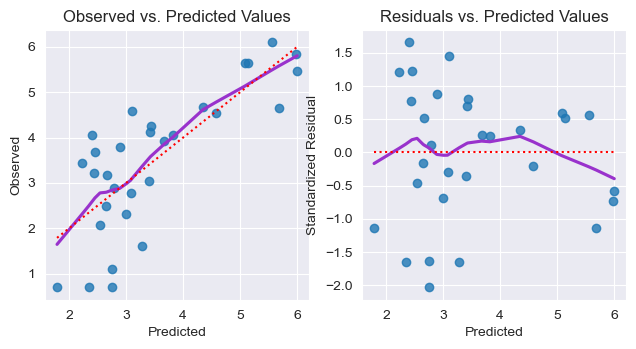

In [29]:
linearity_test(gmodel, gala['species_ln'])

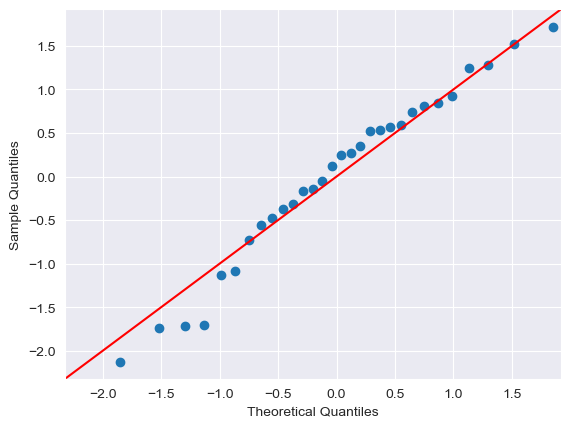

In [30]:
smg.qqplot(resid, fit=True, line='45')
plt.show()

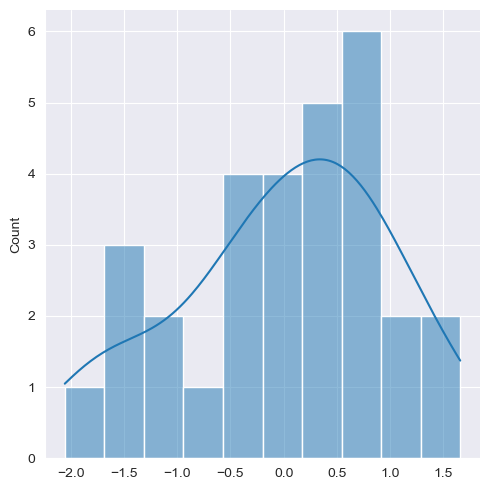

In [31]:
sns.displot(resid, kde=True, bins=10)
plt.show()

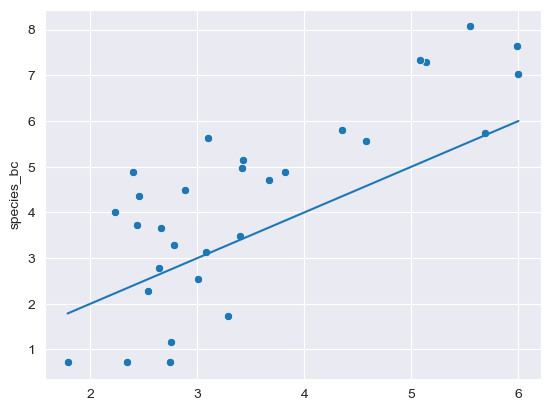

In [32]:
fig, ax = plt.subplots()
sns.scatterplot(x=pred, y=gala['species_bc'])
sns.lineplot(x=pred,y=pred)
plt.show()

In [33]:
gala['species']

0      58
1      31
2       3
3      25
4       2
5      18
6      24
7      10
8       8
9       2
10     97
11     93
12     58
13      5
14     40
15    347
16     51
17      2
18    104
19    108
20     12
21     70
22    280
23    237
24    444
25     62
26    285
27     44
28     16
29     21
Name: species, dtype: int64

In [34]:
#One way - using a built-in function
from scipy.special import inv_boxcox
spec = inv_boxcox(gala['species_bc'],lamb)
spec

0      58.0
1      31.0
2       3.0
3      25.0
4       2.0
5      18.0
6      24.0
7      10.0
8       8.0
9       2.0
10     97.0
11     93.0
12     58.0
13      5.0
14     40.0
15    347.0
16     51.0
17      2.0
18    104.0
19    108.0
20     12.0
21     70.0
22    280.0
23    237.0
24    444.0
25     62.0
26    285.0
27     44.0
28     16.0
29     21.0
Name: species_bc, dtype: float64

In [35]:
# Alternatively and possibly easier if you can remember it
spec = gala['species_bc'].apply(lambda xx: (lamb * xx + 1)**(1/lamb))
spec

0      58.0
1      31.0
2       3.0
3      25.0
4       2.0
5      18.0
6      24.0
7      10.0
8       8.0
9       2.0
10     97.0
11     93.0
12     58.0
13      5.0
14     40.0
15    347.0
16     51.0
17      2.0
18    104.0
19    108.0
20     12.0
21     70.0
22    280.0
23    237.0
24    444.0
25     62.0
26    285.0
27     44.0
28     16.0
29     21.0
Name: species_bc, dtype: float64

In [36]:
# Inverse of np.log is np.exp
gala['species_ln'].apply(np.exp)

0      58.0
1      31.0
2       3.0
3      25.0
4       2.0
5      18.0
6      24.0
7      10.0
8       8.0
9       2.0
10     97.0
11     93.0
12     58.0
13      5.0
14     40.0
15    347.0
16     51.0
17      2.0
18    104.0
19    108.0
20     12.0
21     70.0
22    280.0
23    237.0
24    444.0
25     62.0
26    285.0
27     44.0
28     16.0
29     21.0
Name: species_ln, dtype: float64

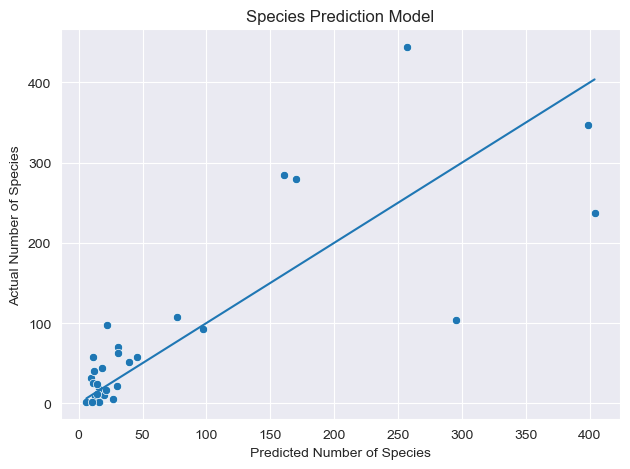

In [37]:
fig, ax = plt.subplots()
sns.scatterplot(x=np.exp(pred), y=gala['species'])
sns.lineplot(x=np.exp(pred),y=np.exp(pred))
ax.set_ylabel('Actual Number of Species')
ax.set_xlabel('Predicted Number of Species')
ax.set_title('Species Prediction Model')
fig.tight_layout()
plt.show()